# MT1 take-home questions
## To be finished and uploaded on Canvas


This is the take-home part due 9/27/24 midnight on Canvas (CDS times vary).  

For the take-home, only the class material is allowed.
Use of external tools, Youtube, ChatGPT etc is not allowed.

You are not permitted to talk to anyone about the take-home.

**-------------------------------------------------------------------------------------**

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.Def_RE2NFA import *
from jove.LangDef    import *  # for testing DFA actions using nthnumeric if needed
from jove.Def_NFA2RE import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 6593, done.
remote: Counting objects: 100% (1959/1959), done.
remote: Compressing objects: 100% (829/829), done.
remote: Total 6593 (delta 1183), reused 1762 (delta 1050), pack-reused 4634 (from 1)
Receiving objects: 100% (6593/6593), 10.54 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (4188/4188), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(flTup)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)

##  Q1: Define a DFA for the language of strings over {a,b} where

* every block of length four or more has,
* for each four consecutive positions in that block
* an odd number of b's. The number of a's does not matter.

### Use the method of complementing these conditions and then building the RE for it (STEP-1)

### and then a minimal DFA (STEP-2)

## Note that if the block is of length 3 or less, no constraint is placed on the number of a's and b's.

### Document your approach in 2 clear sentences.

# SOLUTION BY STUDENT for STEP-1



**Solution** I will align the section with even b's to the start of a block, then ensure that block has an even amount of B's. Then I will find the complement of that DFA which should give the solution.

In [10]:
# We just need to find the RE for any block of 4 characters having even amounts of b's

# Separate out blocks first
# This allows a repeating pattern of 4 characters
RE_blocks_of_4 = "((a+b)(a+b)(a+b)(a+b))*"

# Now the leftover 3 characters can be anything, or nothing, with no restrictions
RE_leftovers = "(a+b+'')(a+b+'')(a+b+'')"

# NOTE: This is assuming that aaabbaaa is VALID under the final DFA, because even though the middle part "abba" doesn't have an odd number of b's, the blocks would be |aaab|baaa| which both have odd numbers of b's.
# If that would be invalid because the blocks dont have to be aligned, then RE_blocks_of_4 and RE_Leftovers can be replaced with (a+b)*

# So now we just need to define a single block with an even number of B's (either 2, 4, or 0)
# We can do this via OR
RE_blocks_with_even_bs = [
    "(aaaa)", # Only string with 0 b's
    "(bbbb)", # Only string with 4,
    "(bbaa)", # there are 4 choose 2 = 6 ways to organize 2 a's and 2 b's
    "(baba)",
    "(baab)",
    "(abba)",
    "(abab)",
    "(aabb)"
]

# now we do a quick concatenation
RE_ored_even_b_blocks = "(" + "+".join( RE_blocks_with_even_bs ) + ")"

# And add them all together

RE_some_block_has_even_bs = RE_blocks_of_4 + RE_ored_even_b_blocks +  RE_blocks_of_4 + RE_leftovers

RE_some_block_has_even_bs

"((a+b)(a+b)(a+b)(a+b))*((aaaa)+(bbbb)+(bbaa)+(baba)+(baab)+(abba)+(abab)+(aabb))((a+b)(a+b)(a+b)(a+b))*(a+b+'')(a+b+'')(a+b+'')"

# STEP-2 here

In [11]:
# The DFA desired is now in one shot -- the student writes it in one shot
DFA_desired = min_dfa(comp_dfa(nfa2dfa(re2nfa(RE_some_block_has_even_bs))))

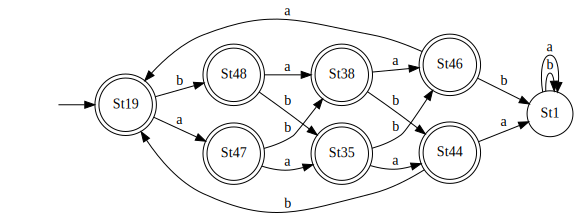

In [12]:
# The student draws
dotObj_dfa(DFA_desired)

In [ ]:
# When all looks good, uncomment this cell + all render cells below, and run all cells again! Then collect the PDFs
# dotObj_dfa(DFA_desired).render('DFA_desired')

#  Q2: Now, separately specify an RE for the set of strings with an odd number of b's and look at its minimal DFA (STEP-3)

# Then build a minimal DFA for the intersection of this RE's DFA and  DFA_desired (STEP-4)

# Noting down which state(s) got merged (STEP-5)

# And justify your final answer (STEP-6) by testing

# STEP-3 below

In [ ]:
# The student writes the RE for STEP-3
RE_odd_bs = ...RE here...

# The student obtains the min DFA in one shot to check the work - as part of STEP-3
minD_RE_odd_bs = ...one-liner....

In [ ]:
dotObj_dfa(minD_RE_odd_bs)

In [ ]:
# Uncomment for final run
# dotObj_dfa(minD_RE_odd_bs).render('minD_RE_odd_bs')

# STEP-4 below

In [ ]:
# The student intersects minD_RE_odd_bs and DFA_desired

D_int = ...step 4 in one shot...

In [ ]:
# The student draws this DFA
dotObj_dfa(D_int)

In [ ]:
# Uncomment for final run
# dotObj_dfa(D_int).render('D_int')

In [ ]:
# The student minimizes D_int

min_D_int = ...

In [ ]:
# The student draws min_D_int

dotObj_dfa(min_D_int)

In [ ]:
# Uncomment for final run
# dotObj_dfa(min_D_int).render('min_D_int')

### STEP-5: Find out the NUMBER OF pairs of state(s) merged

In [ ]:
len(min_D_int["Q"])

In [ ]:
len(D_int["Q"])

# STEP-5 answer below

... THESE STATE-PAIRS GOT MERGED...

... USE AS MANY...

FIRST PAIR : ....

SECOND PAIR : ....

THIRD PAIR : ....


# STEP-6 BELOW

# The student generates numeric order strings in range 128 following outline in Overview_of_CS3100 in module 00_...

In [ ]:
TestStrings = [nthnumeric(i, ['a','b']) for i in range(128)]

# The student finds out accept/reject

In [ ]:

for test in TestStrings:
    if accepts_dfa(D_int, test):
        print("DFA D_int accepts ", test)
    else:
        print("DFA D_int rejects ", test)

# The student explains below that this answer is correct - one sentence after "why". IN STEP-6

DFA D_int accepts  bbabbb - why

DFA D_int rejects  bbbaaa - why

DFA D_int rejects  bbbaab - why

DFA D_int rejects  bbbaba - why

DFA D_int accepts  bbbabb - why

DFA D_int rejects  bbbbaa - why


**-------------------------------------------------------------------------------------**